### <p style="text-align: right;"> &#9989; Put your name here.</p>

# PHY480 Day 21

## In-class assignment: Data fitting

In this in-class assignment we experiment with data fitting, using non-linear least squares.


In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline


**Task 1.** Use `scipy.optimize.curve_fit` to fit the following data with polynomials of degree from 1 to 4. Print out the parameters and the $\chi^2$ per degree of freedom (i.e. number of data points minus the number of parameters) and their errorbars (as returned by the fitter).

In [12]:
# data
x_i = np.array( [0.18, 0.36, 0.54, 0.72, 0.9,  1.08, 1.26, 1.44, 1.62, 1.8 ] )
y_i = np.array( [1.09503784, 0.71869347, 0.50444052, 0.26076108, 0.54495008, 0.4792106, 0.90324932, 1.46314384, 2.50635488, 4.46996314] )
sigma_i = np.array( [0.15554048, 0.04750824, 0.16485571, 0.19314984, 0.19452022, 0.09068985, 0.12180849, 0.1551053,  0.12832267, 0.14440365] )


In [ ]:
f1 = lambda x, m1: x*m1
f2 = lambda x, m1, m2: x*m1 + x**2*m2
f3 = lambda x, m1, m2, m3: x*m1 + x**2*m2 + x**3*m3 
f4 = lambda x, m1, m2, m3, m4: x*m1 + x**2*m2 + x**3*m3 + x**4*m4

fs = [f1, f2, f3, f4]

all_params = []
all_xi2 = []

for f in fs:
    params, xi2 = scipy.optimize.curve_fit(f, x_i, y_i, sigma=sigma_i ) #measured in units of standard deviation
    all_params.append(params)
    all_xi2.append(xi2)

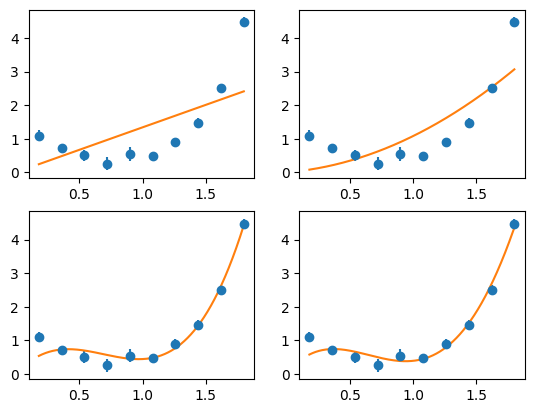

In [29]:
x = np.linspace(x_i.min(), x_i.max(), 1000)

fig, axs = plt.subplots(2,2)
axs = axs.flatten()

for ax, f, m in zip(axs, fs, all_params):
    ax.errorbar(x_i, y_i, yerr=sigma_i, fmt='o')
    ax.plot(x, f(x,*m))

&#169; Copyright 2025,  Michigan State University Board of Trustees

$$
p_i \sim e^{-\frac{\left(y_i - f(x_i, \vec a)\right)^2}{2\sigma_i^2}}
$$

This means

$$
p(\{y_i \}) \sim p_1 p_2 p_3 \dots \sim e^{-\sum_{i=0}^n \frac{\left(y_i - f(x_i, \vec a)\right)^2}{2\sigma_i^2} }
$$
Which is kinda gaussian. This tells us the probability of the result $\{y_i\}$ from given paramenters $\vec a$

Another way of looking at this:

Assume $f(x_i;\vec a)$ are known and unknown parameters which maximize that term above $\Rightarrow$ maximium likelihood of estimate $\vec a$

We can pull out the normalization $2$, which means that $\xi^2$ is

$$
x^2 = \sum_{i=1}^{n} \left( \frac{y_i - f(x_i ; \bar{a})}{\sigma_i}\right)^2
$$

A non-linear least squares problem. The linear problem has an analytical solution

How does scipy work?

$$
\mathcal F (\vec a) = \frac{1}{2} \sum_{i=1}^{m} r_i^2 (\vec a) \\
r_i(\vec a) = \frac{y_i - f(x_i, \vec a)}{\sigma_i} \\
$$
More:
$$
\vec r(\vec a) = (r_1(\vec a) , r_2(\vec a), r_3(\vec a), r_4(\vec a))^T \\
$$
$\vec a$ has $n$ parameters, and $m \geq n \rightarrow \mathcal F(\vec a) - \frac{1}{2} |\vec r|^2$

$\vec r(\vec a)$ is our function to minimize.

$$
\mathcal J(\vec a) = \frac{\partial r_j}{\partial a_i} \equiv \left( \vec \nabla r_1 (\vec a) , \vec \nabla r_2 (\vec a) , \dots  \right)^T \\
\mathcal H_{\mathcal F} = \mathcal J^T J + \sum_{j=1}^m r_j (\vec a) \nabla^2 r_j (\vec a)
$$

Scipy is 2nd order  <br>
->

$$
\mathcal H_{\mathcal F} (\vec a_k) \vec P_k^{\text{Generalized Newton}} = - \vec \nabla \mathcal F (\vec a_k) \\
\text{specific: } \mathcal J^T(\vec a_k) \mathcal J (\vec a_k) \vec p_K^{\text{GN}} = - J(\vec a_k) \vec r(\vec a_k) \\
$$
We can get even more specific to overcome saddle points, etc.: Lovenberg - Marquardt. 

$$
\left( \mathcal J_k^T \mathcal J_k + \lambda_k I \right) \vec p_k^{\text{LM}}  = - \mathcal J_k^T \vec r_k 
$$
This gives us an adjustable parameter $\lambda_k$ that allows us to get to descent direction

$$
\xi^2 = \sum_i \left( \frac{y_i - f(x_i;\vec a)}{\sigma_i}\right)^2 \\
\frac{\xi^2}{\text{dof}}=1 \\
1 = \int_{-\infty}^{\infty} dy_1 \int_{-\infty}^{\infty} \dots \int_{-\infty}^{\infty} dy_m \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi} \sigma_i}e^{-\left(\frac{y_i - f(x_i ; \vec a)}{\sqrt{2}\sigma_i}\right)^2} \\
\times \int_0^\infty d(\xi^2) \delta\left(\xi^2 - \sum_{i=1}^m \left(\frac{y_i - f(x_i;\vec a)}{\sigma_i} \right)^2 \right)
$$
Applying the delta function gives us

$$
1 = \int_0^\infty d(\xi^2) e^{-\xi^2/2}
$$